### Performance 

In [5]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

In [6]:
functions =bf.__all__
functions   

['Ackley1',
 'Ackley4',
 'Alpine1',
 'Alpine2',
 'Bohachevsky',
 'Brent',
 'Brown',
 'CarromTable',
 'ChungReynolds',
 'Cigar',
 'CosineMixture',
 'CrossInTray',
 'CrossLegTable',
 'CrownedCross',
 'Csendes',
 'Deb1',
 'Deb2',
 'DeflectedCorrugatedSpring',
 'DixonPrice',
 'DropWave',
 'EggHolder',
 'Ellipsoid',
 'ExpandedDecreasingMinima',
 'ExpandedEqualMinima',
 'ExpandedFiveUnevenPeakTrap',
 'ExpandedTwoPeakTrap',
 'ExpandedUnevenMinima',
 'Exponential',
 'F2',
 'Giunta',
 'Griewank',
 'HappyCat',
 'HyperEllipsoid',
 'InvertedCosineWave',
 'JennrichSampson',
 'KTablet',
 'Katsuura',
 'Levy',
 'LunacekN01',
 'LunacekN02',
 'Michalewicz',
 'Mishra1',
 'Mishra2',
 'Mishra7',
 'Mishra11',
 'ModifiedVincent',
 'NeedleEye',
 'Pathological',
 'Periodic',
 'Perm01',
 'Perm02',
 'Pinter',
 'PowellSum',
 'Price01',
 'Qing',
 'Quartic',
 'Quintic',
 'Rana',
 'Rastrigin',
 'Ridge',
 'Rosenbrock',
 'RotatedHyperEllipsoid',
 'Salomon',
 'Sargan',
 'SchafferN1',
 'SchafferN2',
 'SchafferN3',
 'Sch

### Ackley 1 
####  Domain Limits::  −35 ≤ xi ≤ 35.
- (Continuous, Differentiable, Non-separable, Scalable, Multi- modal)
- The global minima is located at origin x∗ = (0,··· ,0),
f(x∗) = 0.

In [ ]:
## Metaheuristics with Dimension 2

# Name: SwarmMetaheuristic

# Code:
import sys
from pathlib import Path
 
import benchmark_func as bf
import metaheuristic as mh

fun = bf.Ackley1(2)   
prob = fun.get_formatted_problem()

heur = [
    ('swarm_dynamic',
     {'factor': 0.7,
      'self_conf': 2.54,
      'swarm_conf': 2.56,
      'version': 'inertial',
      'distribution': 'uniform'},
     'greedy'),
    ('local_random_walk',
     {'probability': 0.75,
      'scale': 1.0,
      'distribution': 'uniform'},
     'greedy')
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# The SwarmMetaheuristic combines the swarm_dynamic operator with the local_random_walk operator.
# Swarm_dynamic provides a global search capability, while local_random_walk offers local exploration.
# Together, they cover a diverse search landscape, increasing the probability of finding the optimal solution.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with greedy
--------------------------------------------------
1
pop. radius: 1.3589592201844543
x_best = [ 1.23840921 -5.4025637 ], f_best = 12.896630098073821
2
pop. radius: 1.197951810878217
x_best = [ 0.82589664 -3.41517117], f_best = 9.732214536213975
3
pop. radius: 1.3045474260400625
x_best = [ 1.53243224 -0.22888985], f_best = 5.99908763274496
4
pop. radius: 1.1964002781094862
x_best = [ 1.53243224 -0.22888985], f_best = 5.99908763274496
5
pop. radius: 1.2051274002334658
x_best = [ 1.53243224 -0.22888985], f_best = 5.99908763274496
6
pop. radius: 1.2341513728136295
x_best = [ 0.9399855  -1.01450016], f_best = 3.652290777352345
7
pop. radius: 1.021859843948406
x_best = [ 0.9399855  -1.01450016], f_best = 3.652290777352345
8
pop. radius: 0.9984040019348811
x_best = [ 0.939985

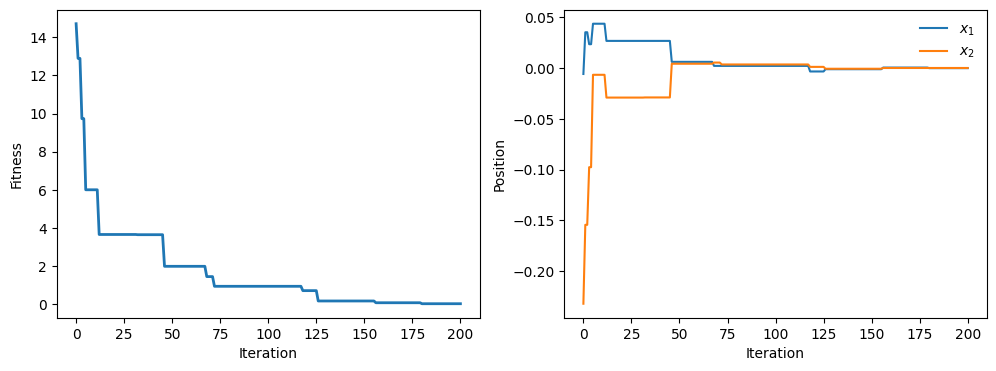

In [8]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [9]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [-8.60055879e-13 -2.35715362e-13], f_best = 8.828138220451365e-11
rep = 2, x_best = [2.03188100e-12 2.47743525e-12], f_best = 3.171898299569875e-10
rep = 3, x_best = [-1.31436750e-12 -2.95026611e-14], f_best = 1.3015011290917755e-10
rep = 4, x_best = [ 2.98502293e-12 -1.11320996e-12], f_best = 3.1538149869447807e-10
rep = 5, x_best = [ 5.06092891e-12 -3.79998794e-12], f_best = 6.265139518291107e-10
rep = 6, x_best = [2.99709750e-12 3.43324188e-12], f_best = 4.511555573571968e-10
rep = 7, x_best = [1.24042559e-12 1.59853854e-13], f_best = 1.2381207170619746e-10
rep = 8, x_best = [ 6.83963313e-12 -5.13726732e-12], f_best = 8.468106216241722e-10
rep = 9, x_best = [-1.62060580e-12  5.11688696e-13], f_best = 1.6823875625959772e-10
rep = 10, x_best = [ 1.22128530e-12 -2.27875897e-12], f_best = 2.559410461344669e-10
rep = 11, x_best = [ 4.71215979e-13 -8.95807430e-13], f_best = 1.0020073659688933e-10
rep = 12, x_best = [-4.02086023e-12 -2.50782154e-12], f_best = 4.6912163043

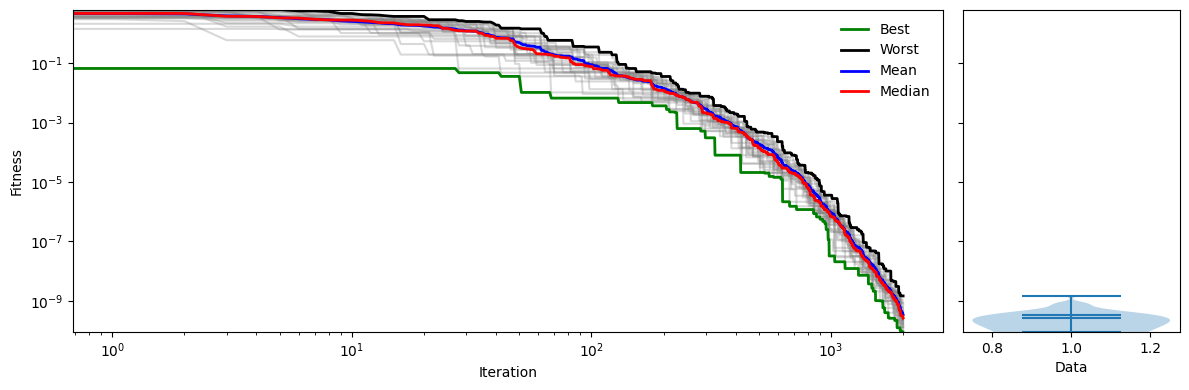

In [10]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()

In [42]:
## Metaheuristics with Dimension 2


# Name: SwarmMetaheuristic
# Code:
import sys
from pathlib import Path
 
import benchmark_func as bf
import metaheuristic as mh

fun = bf.Ackley1(2)   
prob = fun.get_formatted_problem()

heur = [
    (  # Search operator 1
        'swarm_dynamic',
        {
            'factor': 0.7,
            'self_conf': 2.54,
            'swarm_conf': 2.56,
            'version': 'inertial',
            'distribution': 'gaussian'
        },
        'greedy'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'uniform'
        },
        'all'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# This metaheuristic combines the swarm optimization of the "swarm_dynamic" operator with the local search capabilities of the "local_random_walk" operator.
# The swarm optimization helps explore the solution space, while the local search ensures that promising solutions are further explored.
# The combination of these operators is expected to result in a balanced exploration and exploitation strategy, leading to a good balance between finding promising solutions and avoiding local optima.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='gaussian') with greedy
local_random_walk(probability=0.75,scale=1.0,distribution='uniform') with all
--------------------------------------------------
1
pop. radius: 1.437085156051247
x_best = [-5.20288929 -0.36319456], f_best = 12.318152904749876
2
pop. radius: 1.504660428061291
x_best = [-5.20288929 -0.36319456], f_best = 12.318152904749876
3
pop. radius: 1.4536531256764054
x_best = [-1.94456491 -5.95219302], f_best = 11.889056874007922
4
pop. radius: 1.7072345167734997
x_best = [-1.94456491 -5.95219302], f_best = 11.889056874007922
5
pop. radius: 1.6006061520060735
x_best = [-1.94456491 -5.95219302], f_best = 11.889056874007922
6
pop. radius: 1.476389176118146
x_best = [-1.94456491 -5.95219302], f_best = 11.889056874007922
7
pop. radius: 1.443901600923106
x_best = [-1.94456491 -5.95219302], f_best = 11.889056874007922
8
pop. radius: 1.6252535380581485
x_best = [-1.9

In [44]:
## Metaheuristics with Dimension 2

## Name: SwarmMetaheuristic

import sys
from pathlib import Path

 
import benchmark_func as bf
import metaheuristic as mh

fun = bf.Ackley1(2)
prob = fun.get_formatted_problem()

heur = [
    ('swarm_dynamic', {'factor': 0.7, 'self_conf': 2.54, 'swarm_conf': 2.56, 'version': 'inertial', 'distribution': 'uniform'}, 'greedy'),
    ('local_random_walk', {'probability': 0.75, 'scale': 0.5, 'distribution': 'gaussian'}, 'metropolis')
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))



Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with greedy
local_random_walk(probability=0.75,scale=0.5,distribution='gaussian') with metropolis
--------------------------------------------------
1
pop. radius: 1.2337604197757597
x_best = [-3.00893048  2.19572081], f_best = 8.96090239352393
2
pop. radius: 1.0375080628567857
x_best = [-2.00220179  2.69456947], f_best = 8.88749677843406
3
pop. radius: 1.2932650846567533
x_best = [-2.80966336  1.86237605], f_best = 8.640695478541591
4
pop. radius: 1.2635755174502643
x_best = [-2.80966336  1.86237605], f_best = 8.640695478541591
5
pop. radius: 1.0016875502704605
x_best = [-2.80966336  1.86237605], f_best = 8.640695478541591
6
pop. radius: 1.1878802991691446
x_best = [-2.80966336  1.86237605], f_best = 8.640695478541591
7
pop. radius: 1.3366544771162623
x_best = [-2.80966336  1.86237605], f_best = 8.640695478541591
8
pop. radius: 1.5096036381695639
x_best = [-2

In [11]:
## Metaheuristics with Dimension 3


In [12]:
## Metaheuristics with Dimension 5


In [13]:
## Metaheuristics with Dimension 10

In [14]:
## Metaheuristics with Dimension 15


In [15]:
## Metaheuristics with Dimension 25


In [16]:
## Metaheuristics with Dimension 35


### Ackley 4 or Modified Ackley Function
####  Domain Limits::  −35 ≤ xi ≤ 35. It is highly multimodal function with two global minimum close to origin
-  (Continuous, Differentiable, Non-Separable, Scalable, Multimodal)
-  It is highly multimodal function with two global minimum close to origin
x = f ({−1.479252, −0.739807}, {1.479252, −0.739807}), f (x∗) = −3.917275.

In [ ]:
## Metaheuristics with Dimension 2



In [18]:
## Metaheuristics with Dimension 3

In [19]:
## Metaheuristics with Dimension 5


In [20]:
## Metaheuristics with Dimension 10

In [21]:
## Metaheuristics with Dimension 15

In [22]:
## Metaheuristics with Dimension 20

In [23]:
## Metaheuristics with Dimension 35

### Alpine 1
####  Domain Limits::  −10 ≤ xi ≤ 10
-  (Continuous, Non-Differentiable, Separable, Non-Scalable, Multimodal)
-  The global minimum is located at origin x∗ = (0, · · · , 0),
f(x∗) = 0.

In [24]:
## Metaheuristics with Dimension 1


In [25]:
## Metaheuristics with Dimension 2

### Alpine 2    
####  Domain Limits::  0 ≤ xi ≤ 10
- (Continuous, Differentiable, Separable, Scalable, Multi-
modal)
-  The global minimum is located at x∗ = (7.917 · · · 7.917), f(x∗) = 2.808D

In [26]:
## Metaheuristics with Dimension 1

In [27]:
## Metaheuristics with Dimension 2


In [28]:
## Metaheuristics with Dimension 3

In [29]:
## Metaheuristics with Dimension 5


In [30]:
## Metaheuristics with Dimension 10

### Bohachevsky 
#### Domain Limits:  −100 ≤ xi ≤ 100
- (Continuous, Differentiable, Separable, Non-Scalable, Multimodal)
-  The global minimum is located at x∗ = f(0,0), f(x∗) = 0.
- 

In [31]:
## Metaheuristics with Dimension 1

In [32]:
## Metaheuristics with Dimension 2

### Brent 
#### Domain Limits: −10 ≤ xi ≤ 10.
-  (Continuous, Differentiable, Non-Separable, Non-Scalable, Uni-
modal)
-  The global minimum is located at x∗ = f(0,0), f(x∗) = 0.

In [33]:
## Metaheuristics with Dimension 1

### Brown 
#### Domain Limits:  −1 ≤ xi ≤ 4.
-  (Continuous, Differentiable, Non-Separable, Scalable, Uni- modal)
-  The global minimum is located at x∗ = f(0,··· ,0),
f(x∗) = 0.


In [34]:
## Metaheuristics with Dimension 2

In [35]:
## Metaheuristics with Dimension 3

In [36]:
## Metaheuristics with Dimension 5

In [37]:
## Metaheuristics with Dimension 10

### Rastrigin 
#### [-5.12, 5.12]
-  The Rastrigin function has several local minima. It is highly multimodal, but locations of the minima are regularly distributed. It is shown in the plot above in its two-dimensional form.
- The function is usually evaluated on the hypercube xi ∈ [-5.12, 5.12], for all i = 1, …, d.
-  The global minimum is located at x∗ = f(0,··· ,0),
f(x∗) = 0.

* The abundance of local minima underlines the necessity of a global optimization algorithm when needing to find the global minimum. Local optimization algorithms are likely to get stuck in a local minimum.



In [48]:
## Metaheuristics with Dimension 2
# Name: Swarm Metaheuristic with Levy Distribution

# Code:
import sys
from pathlib import Path


import benchmark_func as bf
import metaheuristic as mh

fun = bf.Rastrigin(2)   
prob = fun.get_formatted_problem()

heur = [
    (
        'swarm_dynamic',
        {
            'factor': 0.7,
            'self_conf': 2.54,
            'swarm_conf': 2.56,
            'version': 'inertial',
            'distribution': 'levy'
        },
        'probabilistic'
    ),
    (
        'local_random_walk',
        {
            'probability': 0.75,
            'scale': 1.0,
            'distribution': 'levy'
        },
        'probabilistic'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))

# Short explanation and justification:
# The Swarm Metaheuristic with Levy Distribution is used to explore the search space effectively. 
# The Levy distribution is more efficient in finding good solutions in complex search spaces.
# The probabilistic selector is used to guide the swarm metaheuristic.


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='levy') with probabilistic
local_random_walk(probability=0.75,scale=1.0,distribution='levy') with probabilistic
--------------------------------------------------
1
pop. radius: 1.1622430667906123
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
2
pop. radius: 1.3572373876935215
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
3
pop. radius: 1.534343044884119
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
4
pop. radius: 1.4494624557085283
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
5
pop. radius: 1.6558898319560527
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
6
pop. radius: 1.6049776623714747
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
7
pop. radius: 1.568376344882834
x_best = [ 0.96970309 -0.98913748], f_best = 2.1226393889109048
8
pop. radius: 1.4620412068486122
x_

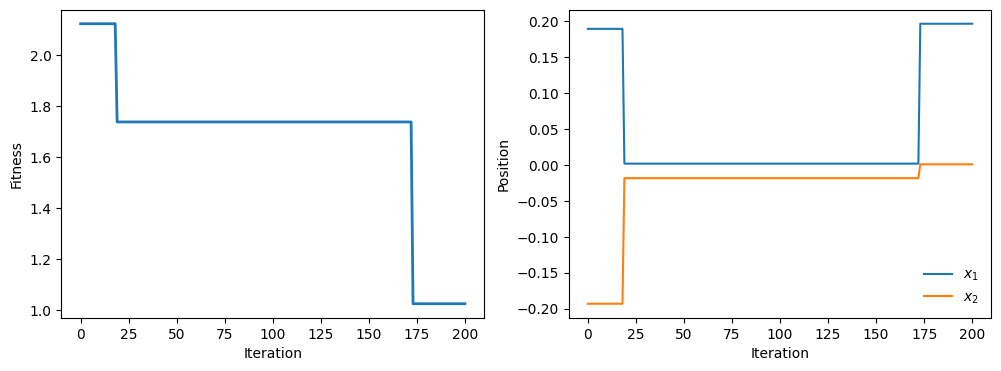

In [51]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [52]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [ 0.00439035 -0.00558804], f_best = 0.2620438755600034
rep = 2, x_best = [-0.00353746  0.00381712], f_best = 0.14069197299081537
rep = 3, x_best = [0.00291592 0.00783359], f_best = 0.36165361163263654
rep = 4, x_best = [ 0.00829098 -0.00071039], f_best = 0.3580204130890472
rep = 5, x_best = [1.44323714e-06 2.59603845e-03], f_best = 0.03502962458351533
rep = 6, x_best = [-0.00368674  0.00488744], f_best = 0.1945820045265343
rep = 7, x_best = [-0.00166454  0.00562029], f_best = 0.17824037458590425
rep = 8, x_best = [-0.00029094 -0.0014867 ], f_best = 0.011933037565675875
rep = 9, x_best = [-0.00048986  0.00299403], f_best = 0.047832530789641226
rep = 10, x_best = [-0.00167865 -0.00095994], f_best = 0.01944341250242232
rep = 11, x_best = [-0.00188454  0.00399658], f_best = 0.10142035704495811
rep = 12, x_best = [0.00134989 0.00638778], f_best = 0.2209428695607656
rep = 13, x_best = [-0.00103553 -0.0012929 ], f_best = 0.014268696781186918
rep = 14, x_best = [-0.00384858  

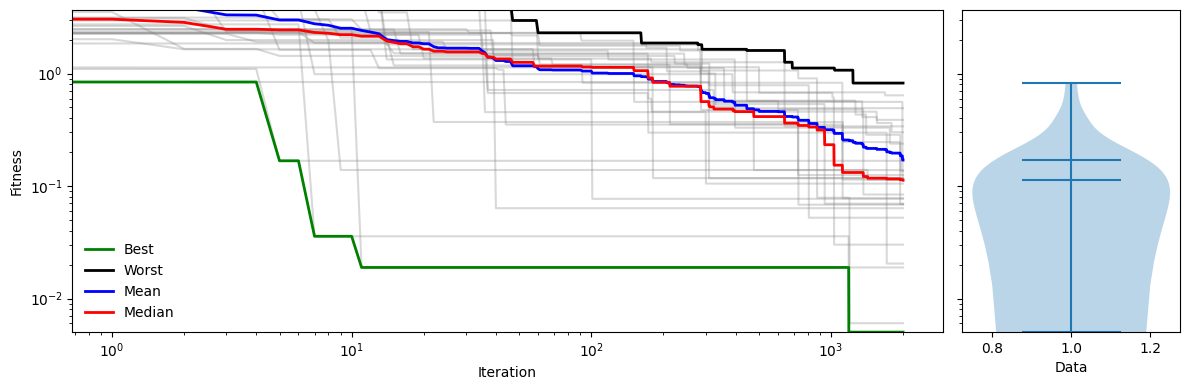

In [ ]:
fitness_array1 = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array1.T])
best_fitness = np.min(fitness_array1)
initial_fitness = max([x[0] for x in fitness_array1])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array1, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array1, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array1, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array1, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array1, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()

In [ ]:
results = {
    'Metaheuristic1': fitness_array1,  # fitness_array1 es el fitness a través de las iteraciones
    'Metaheuristic2': fitness_array1,
    # Añade más metaheurísticas según necesites
}

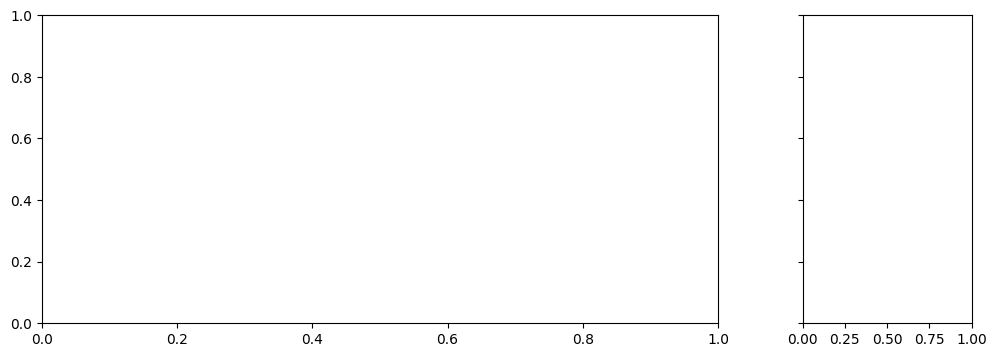

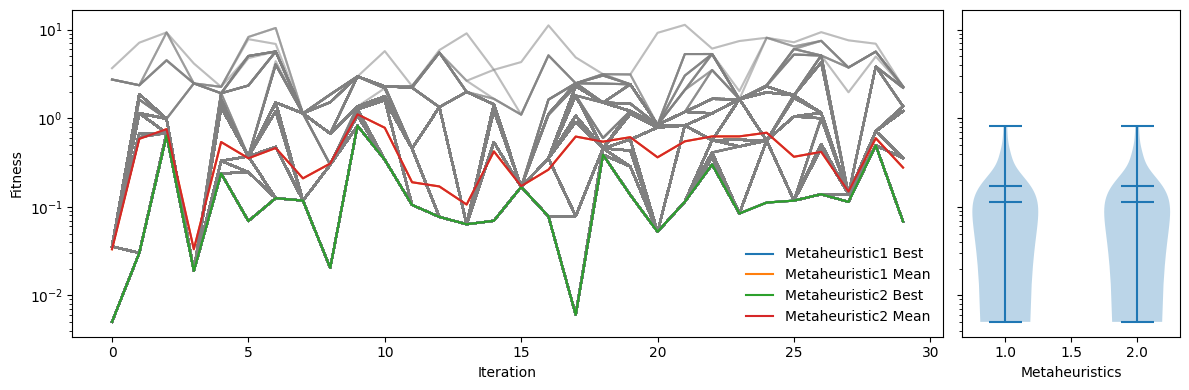

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura y ejes para cada metaheurística
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})

# Iterar sobre cada metaheurística
for name, fitness_array in results.items():
    # Transponer para manejar cada metaheurística
    fitness_array = np.array(fitness_array).T
    final_fitness = np.array([x[-1] for x in fitness_array.T])
    best_fitness = np.min(fitness_array)
    initial_fitness = max([x[0] for x in fitness_array])
    
    # Graficar las líneas de evolución del fitness
    axs[0].plot(fitness_array, 'grey', alpha=0.3)
    axs[0].plot(np.min(fitness_array, axis=1), label=f'{name} Best')
    axs[0].plot(np.mean(fitness_array, axis=1), label=f'{name} Mean')
    
# Personalizar la gráfica
axs[0].set_ylabel('Fitness')
axs[0].set_xlabel('Iteration')
axs[0].set_yscale('log')
axs[0].legend(frameon=False)

# Diagrama de violín
all_final_fitness = [np.array([x[-1] for x in results[name].T]) for name in results]
axs[1].violinplot(all_final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel('Metaheuristics')
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()


In [ ]:
parameters = dict(
    cardinality=3,  # Max. numb. of SOs in MHs, lvl:1
    cardinality_min=1,  # Min. numb. of SOs in MHs, lvl:1
    num_iterations=100,  # Iterations an MH performs, lvl:1
    num_agents=30,  # Agents in population,     lvl:1
    as_mh=True,  # HH sequence as a MH?,     lvl:2
    num_replicas=30,  # Replicas per each MH,     lvl:2
    num_steps=50,  # Trials per HH step,       lvl:2
    stagnation_percentage=0.37,  # Stagnation percentage,    lvl:2
    max_temperature=100,  # Initial temperature (SA), lvl:2
    min_temperature=1e-6,  # Min temperature (SA),     lvl:2
    cooling_rate=1e-3,  # Cooling rate (SA),        lvl:2
    temperature_scheme='fast',  # Temperature updating (SA),lvl:2
    acceptance_scheme='exponential',  # Acceptance mode,          lvl:2
    allow_weight_matrix=True,  # Weight matrix,            lvl:2
    trial_overflow=False,  # Trial overflow policy,    lvl:2
    learnt_dataset=None,  # If it is a learnt dataset related with the heuristic space
    repeat_operators=True,  # Allow repeating SOs inSeq,lvl:2
    verbose=True,  # Verbose process,          lvl:2
    learning_portion=0.37,  # Percent of seqs to learn  lvl:2
    solver='static')  # Indicate which solver use lvl:1

In [ ]:
metaheuristics_genrated = [
    ('swarm_dynamic', {'factor': np.float64(0.7), 'self_conf': np.float64(2.54), 'swarm_conf': np.float64(2.56), 'version': 'inertial', 'distribution': 'gaussian'}, 'metropolis'),
    ('local_random_walk', {'probability': np.float64(0.75), 'scale': np.float64(1.0), 'distribution': 'gaussian'}, 'metropolis'),
    ('local_random_walk', {'probability': np.float64(0.75), 'scale': np.float64(1.0), 'distribution': 'uniform'}, 'metropolis'),('spiral_dynamic', {'radius': np.float64(0.9), 'angle': np.float64(22.5), 'sigma': np.float64(0.1)}, 'probabilistic'),
    ('spiral_dynamic', {'radius': np.float64(0.9), 'angle': np.float64(22.5), 'sigma': np.float64(0.1)}, 'probabilistic'),('swarm_dynamic', {'factor': np.float64(0.7), 'self_conf': np.float64(2.54), 'swarm_conf': np.float64(2.56), 'version': 'inertial', 'distribution': 'levy'}, 'probabilistic')

]


In [ ]:
from customhys import hyperheuristic as hh

dimensions = 5
fun = bf.Griewank(dimensions)

cate = fun.get_features()
prob = fun.get_formatted_problem()

hyp = hh.Hyperheuristic(heuristic_space=metaheuristics_genrated,
                        problem=prob, parameters=parameters, file_label='Griewank-5D-Exp2')

best_sol, best_perf, hist_curr, hist_best = hyp.solve()

Griewank-5D-Exp2 :: Step:    0, Action: None        , Temp: 1.00e+02, Card:   1, Perf: 4.07e-01 [Initial]
Griewank-5D-Exp2 :: Step:    1, Action: AddMany     , Temp: 1.00e+02, Card:   3, candPerf: 8.47e-01, currPerf: 4.07e-01, bestPerf: 4.07e-01 , [Delta: 4.39e-01, ArgProb: -3.12e-03, Prob: 1.00] A
Griewank-5D-Exp2 :: Step:    2, Action: Remove      , Temp: 5.00e+01, Card:   2, candPerf: 1.25e+00, currPerf: 8.47e-01, bestPerf: 4.07e-01 , [Delta: 4.04e-01, ArgProb: -5.74e-03, Prob: 0.99] A
Griewank-5D-Exp2 :: Step:    3, Action: Restart     , Temp: 3.33e+01, Card:   2, candPerf: 1.78e+00, currPerf: 1.25e+00, bestPerf: 4.07e-01 , [Delta: 5.26e-01, ArgProb: -1.12e-02, Prob: 0.99] A
Griewank-5D-Exp2 :: Step:    4, Action: Add         , Temp: 2.50e+01, Card:   3, candPerf: 1.94e+00, currPerf: 1.78e+00, bestPerf: 4.07e-01 , [Delta: 1.67e-01, ArgProb: -4.76e-03, Prob: 1.00] A
Griewank-5D-Exp2 :: Step:    5, Action: Roll        , Temp: 2.00e+01, Card:   3, candPerf: 1.89e+00, currPerf: 1.94e+0

In [ ]:
print("Performance: ", best_perf)
print(best_sol)

Performance:  0.4074329607681152
[4]


In [ ]:
from customhys import tools as tl
full_data = tl.merge_json("./data_files/raw/Griewank-5D-Exp2")

100%|██████████| 23/23 [00:00<00:00, 71.56it/s] 


Merged file saved: ./data_files/raw/Griewank-5D-Exp2.json


In [ ]:
full_data = tl.read_json("./data_files/raw/Griewank-5D-Exp2.json")
    

In [ ]:
tl.printmsk(full_data)


|-- {list: 23}
|  |-- 0 = {dict: 5}
|  |  |-- file_name = {str}
|  |  |-- step = {int}
|  |  |-- encoded_solution = {list: 1}
|  |  |  |-- 0 = {int}
:  :  :  :  
|  |  |-- performance = {float}
|  |  |-- details = {dict: 4}
|  |  |  |-- historical = {list: 30}
|  |  |  |  |-- 0 = {dict: 4}
|  |  |  |  |  |-- fitness = {list: 101}
|  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  
|  |  |  |  |  |-- position = {list: 101}
|  |  |  |  |  |  |-- 0 = {list: 5}
|  |  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  :  
:  :  :  :  :  :  :  
|  |  |  |  |  |-- centroid = {list: 101}
|  |  |  |  |  |  |-- 0 = {list: 5}
|  |  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  :  
:  :  :  :  :  :  :  
|  |  |  |  |  |-- radius = {list: 101}
|  |  |  |  |  |  |-- 0 = {float}
:  :  :  :  :  :  :  
:  :  :  :  :  
|  |  |  |-- fitness = {list: 30}
|  |  |  |  |-- 0 = {float}
:  :  :  :  :  
|  |  |  |-- positions = {list: 30}
|  |  |  |  |-- 0 = {list: 5}
|  |  |  |  |  |-- 0 = {float}
:

In [ ]:
num_steps = len(full_data)
# print(full_data['details'])
# historical_fitness = [[x[['fitness']][-1] for x in historical] for historical in full_data['details']]
historical_fitness = [x['details']['fitness'] for x in full_data]
performances = [x['performance'] for x in full_data]
steps = [x['step'] for x in full_data]

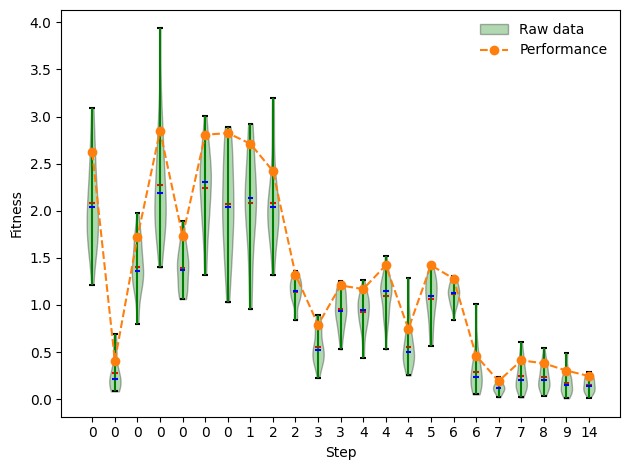

In [ ]:
from customhys import visualisation as vis
vis.show_performance_overview(steps, historical_fitness, performances)
